In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import pickle4 as pickle

In [2]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()


In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
train_dir = 'imgs/train'
test_dir = 'imgs/test'

In [5]:
classes = [c for c in os.listdir(train_dir)]
print(classes)

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']


In [6]:
attribute = {'c0' : "safe driving",
              'c1': "texting - right",
              'c2': "talking on the phone - right",
              'c3': "texting - left",
              'c4': "talking on the phone - left",
              'c5': "operating the radio",
              'c6': "drinking",
              'c7': "reaching behind",
              'c8': "hair and makeup",
              'c9': "talking to passenger"}

{'c0': 2489, 'c1': 2267, 'c2': 2317, 'c3': 2346, 'c4': 2326, 'c5': 2312, 'c6': 2325, 'c7': 2002, 'c8': 1911, 'c9': 2129}


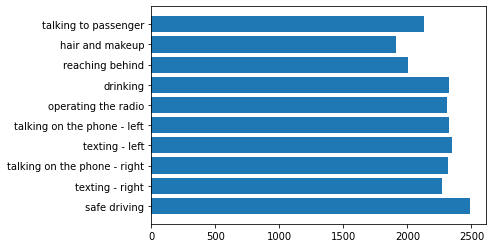

In [7]:
d = {}
for c in classes:
    imgs = [img for img in os.listdir(os.path.join(train_dir,c))]
    count = 0
    for img in imgs:
        count+=1
    d[c]=count
    
print(d)

k = list(d.keys())
v = list(d.values())
k = [i if i not in k else attribute[i] for i in k]

plt.barh(k,v)
plt.show()


In [8]:

train_datagen = ImageDataGenerator(rescale = 1.0/255,validation_split=0.25)
train = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (224, 224),
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    shuffle = True,
                                                    subset = 'training'
                                                  )
validate = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size = (224, 224),
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    shuffle = True,
                                                    subset = 'validation'
                                                  )


Found 16822 images belonging to 10 classes.
Found 5602 images belonging to 10 classes.


(16, 224, 224, 3)
(16, 10)


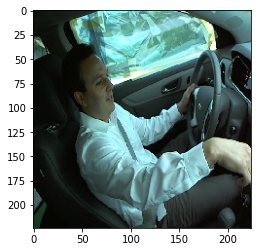

In [9]:
import matplotlib.pyplot as plt
for img,labels in train:
  plt.imshow(img[0])
  print(img.shape)
  print(labels.shape)
  break

In [11]:
def convolutional_model():    


    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(227,227,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation=tf.keras.layers.LeakyReLU(alpha=0.01), padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
    
    return model

# def convolutional_model():    
#     model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(4096, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(10, activation='softmax')])

#     return model

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
# def convolutional_model():
#     model = Sequential()
#     model.add(tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#     model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
#     #model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
#     #model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
#     #model.add(tf.keras.layers.BatchNormalization())
# #     model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# #     model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# #     model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# #     model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
#     #model.add(tf.keras.layers.BatchNormalization())
#     model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#     model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(units=2048,activation="relu"))
#     #model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Dense(units=1024,activation="relu"))
#     model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
    
#     return model

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Dropout
# def convolutional_model():
#     model = Sequential()
#     model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
#     model.add(Dropout(0.2))

#     model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
#     model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
#     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
#     model.add(BatchNormalization())
# #     model.add(Dropout(0.2))
    
# #     model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
# #     model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
# #     model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding='same'))
# #     model.add(BatchNormalization())

#     model.add(Flatten())
#     model.add(Dense(units = 256,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(units = 256,activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(10,activation='softmax'))
    
#     return model

In [13]:
class CustomCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(CustomCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [14]:
my_callback = CustomCallback(threshold=0.99)

In [15]:
loss =tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                label_smoothing=0,
                                                axis=-1,
                                                reduction="auto",
                                                name="categorical_crossentropy",
                                                )
sgd = tf.keras.optimizers.SGD(
                learning_rate=0.01, 
                momentum=0.9, 
                nesterov=False, 
                name="SGD"
)

In [16]:
model = convolutional_model()

model.compile(optimizer=sgd, 
              loss=loss, 
              metrics=['accuracy'], 
              ) 

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 256)      1024      
 hNormalization)                                                 
                                                        

In [18]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

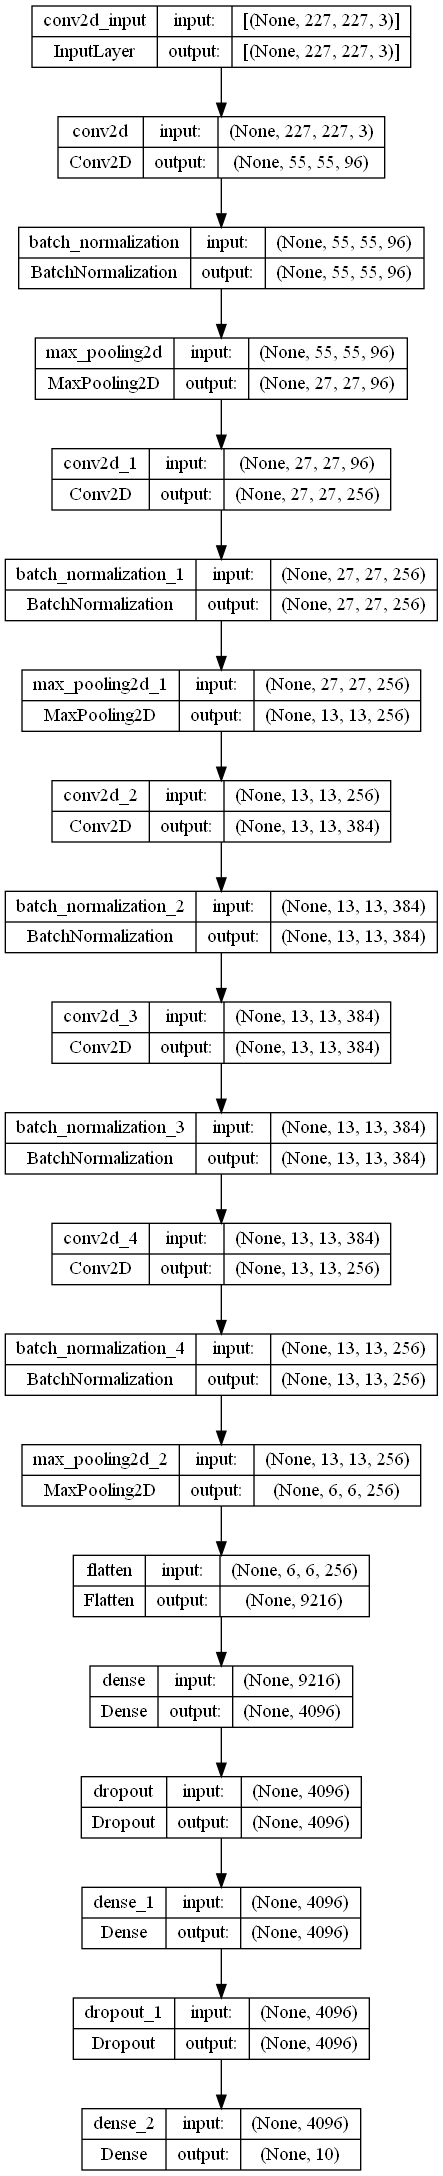

In [19]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [20]:
gpu_devices = tf.config.list_physical_devices('GPU')
print(gpu_devices)
if gpu_devices:
  print(tf.config.experimental.get_memory_usage('GPU:0'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use tf.config.experimental.get_memory_info(device)['current'] instead.
233318656


In [ ]:
history = model.fit(train,
          epochs = 100,
          verbose = 1,
          validation_data = validate,
          callbacks=[my_callback]
          )

In [ ]:
from tensorflow.keras.models import save_model
save_model(model, "myModel.h5")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(history.history['loss'], color='r', label="Training loss")
ax1.plot(history.history['val_loss'], color='g', label="validation loss")
ax1.set_xticks(np.arange(1, 100, 1))
ax1.set_yticks(np.arange(0, 2, 0.1))

ax2.plot(history.history['accuracy'], color='r', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='g',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 100, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
# import pickle
# # model = pickle.load(open('model_alexnet_relu_samlewiseMean.pkl', 'rb'))
# from tensorflow import keras
# with open("./model_vgg16_overnight.pkl" , 'rb') as f:
#     lr = pickle.load(f)

In [ ]:
c = 0
folder = './imgs/test/'

data = []
for name in os.listdir(folder):
  path = folder+name
  image = tf.keras.preprocessing.image.load_img(path)
  image = image.resize((224, 224))
#   imgplot = plt.imshow(image)
#   plt.show()
  img = tf.keras.preprocessing.image.img_to_array(image) 
  img = img/255.0
  img = img.reshape(-1,224, 224, 3)

  pred = model.predict(img)
  row = pred[0].tolist()
  row.insert(0,name)
  data.append(row)
  print(row)
  c+= 1
#   if(c==50):
#     break
print(c)
data

In [ ]:
attribute = {'c0' : "safe driving",
              'c1': "texting - right",
              'c2': "talking on the phone - right",
              'c3': "texting - left",
              'c4': "talking on the phone - left",
              'c5': "operating the radio",
              'c6': "drinking",
              'c7': "reaching behind",
              'c8': "hair and makeup",
              'c9': "talking to passenger"}
df = pd.DataFrame(data,columns=['img','c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'])

In [ ]:
df

In [ ]:
import csv

df.to_csv('submission.csv',index = False)